In [64]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

tayko = pd.read_csv('datas/Tayko.csv')


In [66]:
print(tayko.columns.values)

['sequence_number' 'US' 'source_a' 'source_c' 'source_b' 'source_d'
 'source_e' 'source_m' 'source_o' 'source_h' 'source_r' 'source_s'
 'source_t' 'source_u' 'source_p' 'source_x' 'source_w' 'Freq'
 'last_update_days_ago' '1st_update_days_ago' 'Web order' 'Gender=male'
 'Address_is_res' 'Purchase' 'Spending']


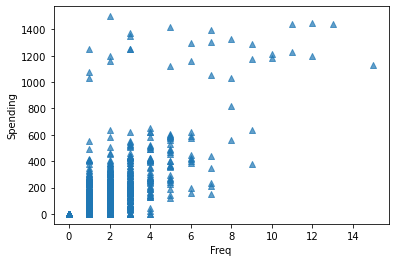

In [68]:
plt.scatter(tayko.Freq, tayko.Spending, alpha=0.7, marker='^')

plt.xlabel("Freq")
plt.ylabel("Spending")
# cbar = plt.colorbar(ticks=[1,0])
# cbar.set_ticklabels(['smoking','non-smoking'])

plt.show()

In [70]:
select_index = ['Freq','last_update_days_ago','Web order','Gender=male', 'Address_is_res','US']
tayko_X = tayko.loc[:, select_index]
print(tayko_X.shape)

(2000, 6)


In [72]:
# Target
tayko_y = tayko.loc[:,'Spending']

In [74]:
X_train, X_valid, y_train, y_valid = \
    train_test_split(tayko_X, tayko_y, test_size = 0.25, random_state=1)

In [76]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [78]:
np.set_printoptions(precision=4, suppress=True)
print(model.coef_)
print(model.intercept_)

[ 90.9795  -0.0088  18.6232  -6.5609 -77.4037  -3.6309]
5.225742042293248


In [79]:
y_pred = model.predict(X_valid)
e = y_valid - y_pred
rmse = np.sqrt(np.mean(e ** 2))
print("rmse:",rmse)

rmse: 156.94191519849107


In [80]:
y_pred_train = model.predict(X_train)
e = y_train - y_pred_train
rmse = np.sqrt(np.mean(e ** 2))
print("rmse:",rmse)
mae = np.mean(np.abs(e))
print("mae:",mae)

rmse: 120.18990948797477
mae: 76.8142668518844
